In [20]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree.

In [21]:
# pip install kaleido

In [22]:
from src import LTVSyntheticData
from src import LTVexploratory
from src.graph import save_plot

### Generate synthetic data 

In [23]:
synth_data_gen = LTVSyntheticData(n_users=20000, random_seed=42)
customer_table = synth_data_gen.get_customers_data()
event_table = synth_data_gen.get_events_data()

# Call the exploratory class
da = LTVexploratory(
    customer_table, 
    event_table,
    registration_time_col='registration_date',
    event_time_col='event_date',
    event_name_col='event_name',
    value_col='value'
    )

In [24]:
# The ‘customer’ table is a user-level table that defines the Day0 of each user who has engaged with 
# the business, marking the initial point of interaction or anchor event, 
# such as installing the App or making a first purchase.

customer_table.head()

,UUID,registration_event_name,country,device,download_method,registration_date
0,1.0,first_app_open,IN,android,wifi,2020-01-02
1,2.0,first_app_open,BR,android,wifi,2022-06-27
2,3.0,first_app_open,ES,ios,wifi,2020-05-08
3,4.0,first_app_open,IN,ios,wifi,2022-03-15
4,5.0,first_app_open,US,android,mobile_data,2020-01-19


In [25]:
# The ‘event’ table is a transaction-level documentation of all revenue-generating events completed 
# for the advertising unit.

event_table.head()

,UUID,event_date,days_since_registration,event_name,value
17,12.0,2022-04-13,17,purchase,1.580250
25,12.0,2022-04-21,25,purchase,154.465789
296,27.0,2021-05-22,16,purchase,1.038395
887,71.0,2022-12-21,2,purchase,2.319024
895,71.0,2022-12-29,10,purchase,4.218515


### Run analysis

In [26]:
# The plot_customers_intersection function shows how much percent of customers are actually purchasers 
# and whether there are customers who are present in the customer table but not present in the events table, 
# and therefore need to be excluded from following analysis.


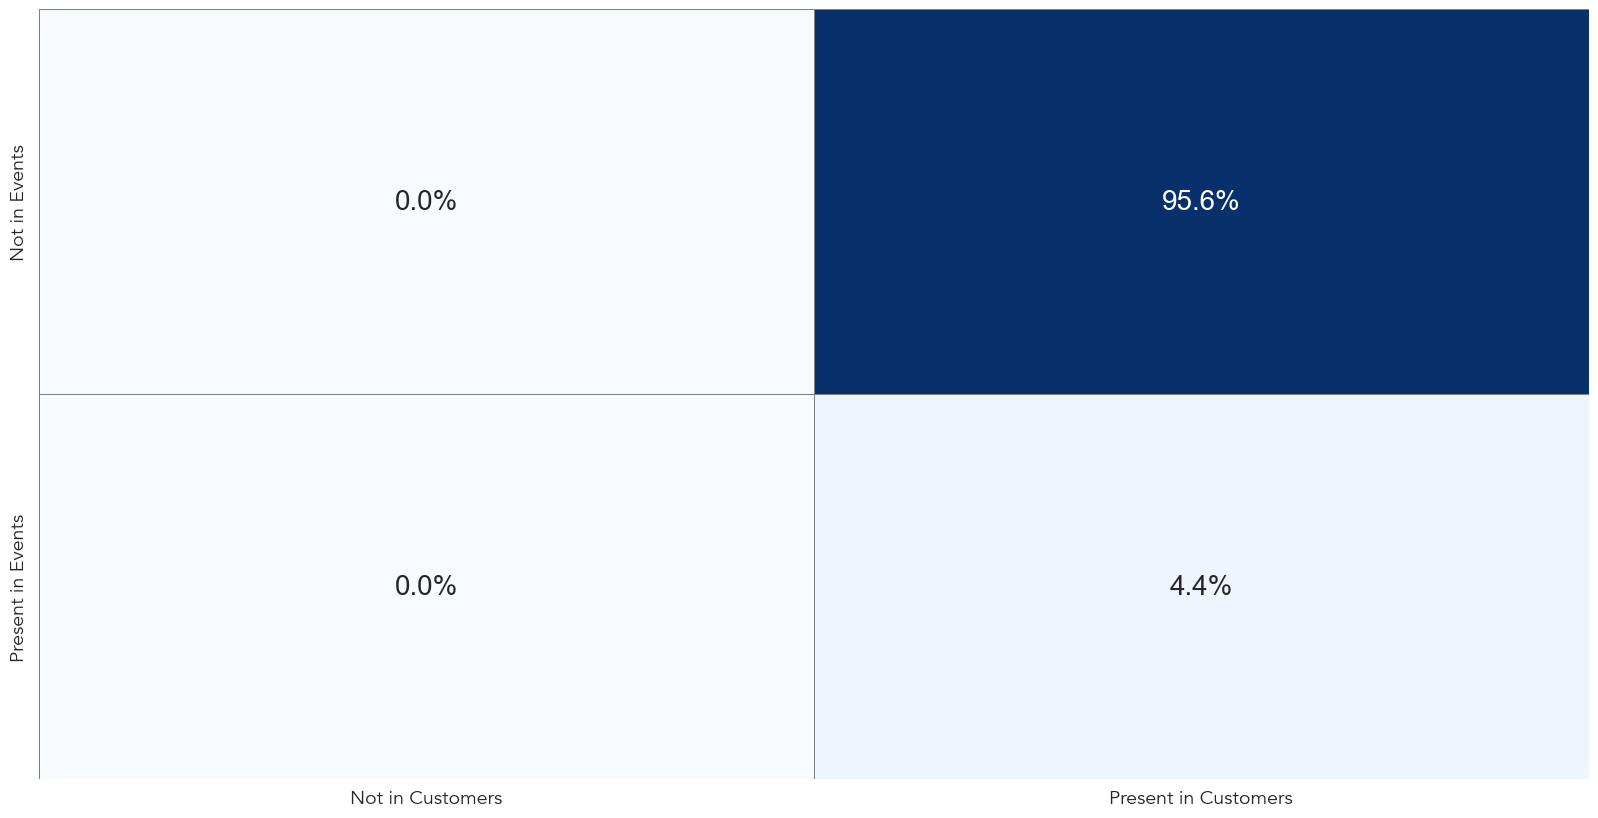

In [27]:
# Intersection between users in the two datasets
fig, data = da.plot_customers_intersection()
save_plot(fig, "images/customer_intersection.png")
# fig


# From the demo data output we can see that: 
# Upper right: 95.6% of customers are not generating any revenue 
# Lower right: 4.4% of all customers are revenue-generating customers or purchasers 
# Lower left: 0.0% means everyone in the customer table are also in the events table, therefore, 
# there’s no need to exclude any customers from following analysis.
# Upper left: should always be 0% 0.0%


Starting spending breaks: {'No spend': 0, 'Low spend': 1.71, 'Medium spend': 3.91, 'High spend': 224.0}
Ending spending breaks: {'No spend': 0, 'Low spend': 2.93, 'Medium spend': 8.02, 'High spend': 6007.0}


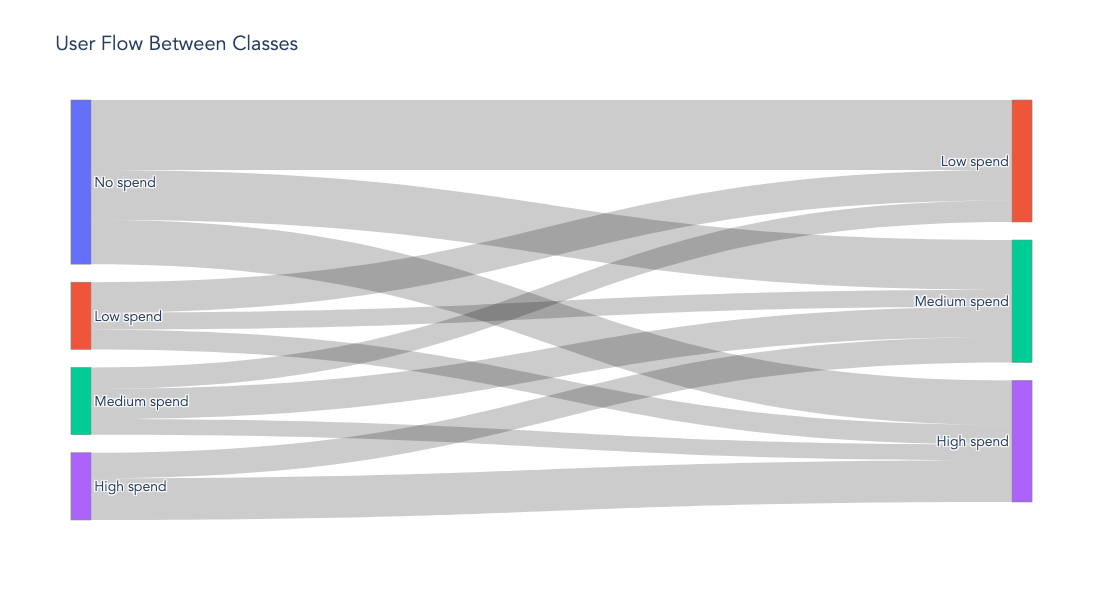

In [28]:
# Paying customers flow from a classification at the beginning to another classification after a longer period.
# If spending breaks is empty, it will find default values, you can specify your own groups in the format Dict[str, float],
# e.g. {'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 1000}

fig, data = da.plot_paying_customers_flow(days_limit=60, early_limit=7, spending_breaks={}, end_spending_breaks={})
save_plot(fig, "images/paying_customer_flow.png", dpi=400) # you can increase the dpi to get a higher resolution
fig

In [29]:
data

,early_class,late_class,customers,early_revenue,early_ltv,median_early_ltv,late_revenue,late_ltv,median_late_ltv
0,No spend,Low spend,0.191176,0.000000,0.000000,0.000000,273.685596,1.754395,1.611287
1,No spend,Medium spend,0.136029,0.000000,0.000000,0.000000,523.235869,4.713837,4.500343
2,No spend,High spend,0.121324,0.000000,0.000000,0.000000,10178.012456,102.808207,16.966085
3,Low spend,High spend,0.053922,56.665534,1.287853,1.235549,2688.790117,61.108866,18.166086
4,Low spend,Low spend,0.083333,88.878048,1.307030,1.262054,112.891776,1.660173,1.463621
5,Low spend,Medium spend,0.046569,49.856838,1.312022,1.286611,185.832830,4.890338,4.709717
6,Medium spend,Low spend,0.058824,109.575846,2.282830,2.370817,109.575846,2.282830,2.370817
7,Medium spend,Medium spend,0.082108,187.462422,2.797947,2.838487,315.587061,4.710255,4.470684
8,Medium spend,High spend,0.042892,98.689689,2.819705,2.797732,798.948848,22.827110,15.868092
9,High spend,Medium spend,0.069853,300.631655,5.274240,5.004287,332.993921,5.841999,5.902942


In [30]:
# The plot_revenue_pareto function visualizes if a significant portion of revenue was contributed by 
# a small group of purchasers.
# Similar to plot_purchases_distribution, the plot_revenue_pareto function uses the same days_limit 
# parameter to generate the output and it operates on the same customer cohorts as 
# the plot_purchases_distribution function. 
# days_limit: Defines the minimum duration since a customers’ initial interaction, for them 
# to be included in this visualization. In this example, the limit is set at 60 days.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:218: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:223: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



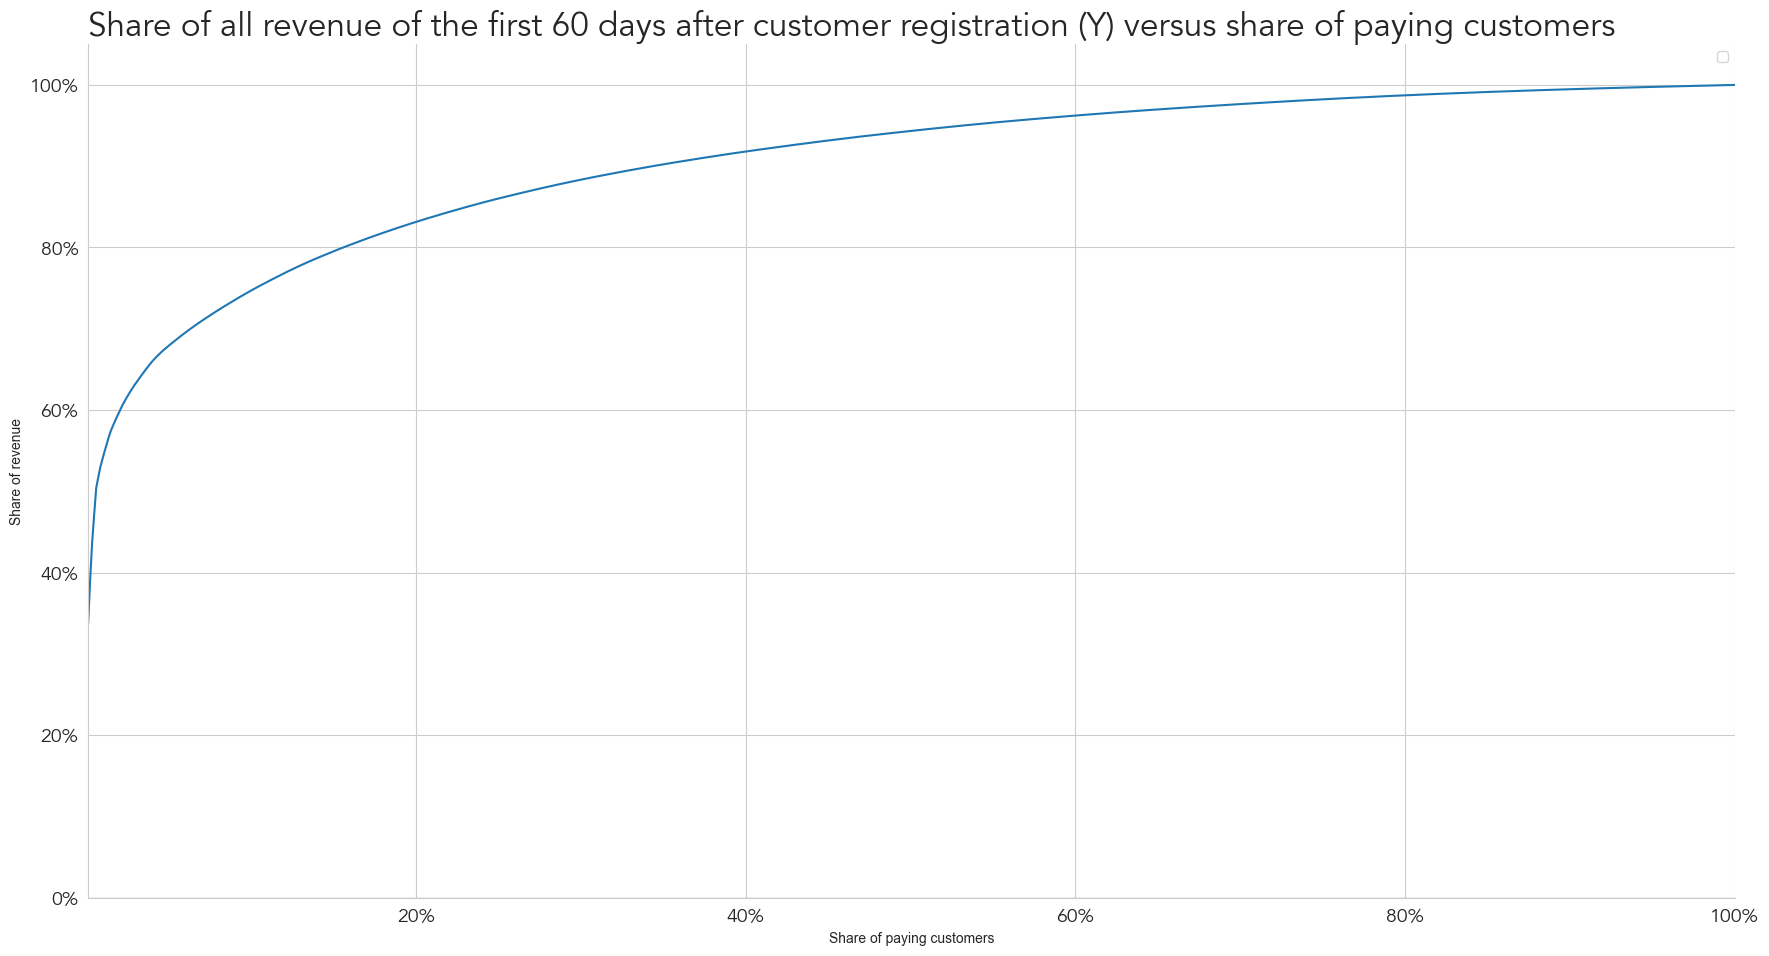

In [31]:
# Visualize how the revenue is concentrated by looking at % of revenue that the highest spending customers contribute
fig, data = da.plot_revenue_pareto(days_limit=60)
save_plot(fig, "images/revenue_pareto.png")
fig


# From the demo data output we can see that:  
# The top 5% highest spending customers contributed to 69% of total revenue
# The top 10% contributed to 75% of total revenue
# The top 20% contributed to more than 84% of total revenue


In [32]:
# Purchase Frequency (or just total purchases) in the first N days of a customer

# The plot_purchases_distribution function visualizes the purchase frequency among all purchasers. 
# This function has two input parameters: 
# days_limit: This parameter defines the minimum duration since a customers’ initial interaction, 
# for them to be included in this visualization. In this example, the time frame is set at 60 days, 
# but you can change it to a time frame that makes most sense for your business. 
# (e.g. 30 days, 120 days or 365 days etc.)


# truncate_share: This parameter defines the percentage of all purchasers that are shown in this visualization, or the percentage of ‘outliers’ that are excluded from this visualization, to make this histogram easier to read. In this example, the truncate_share is set to 0.999, which means that the top 0.1% of the highest spenders were excluded from this visualization. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:218: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:223: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



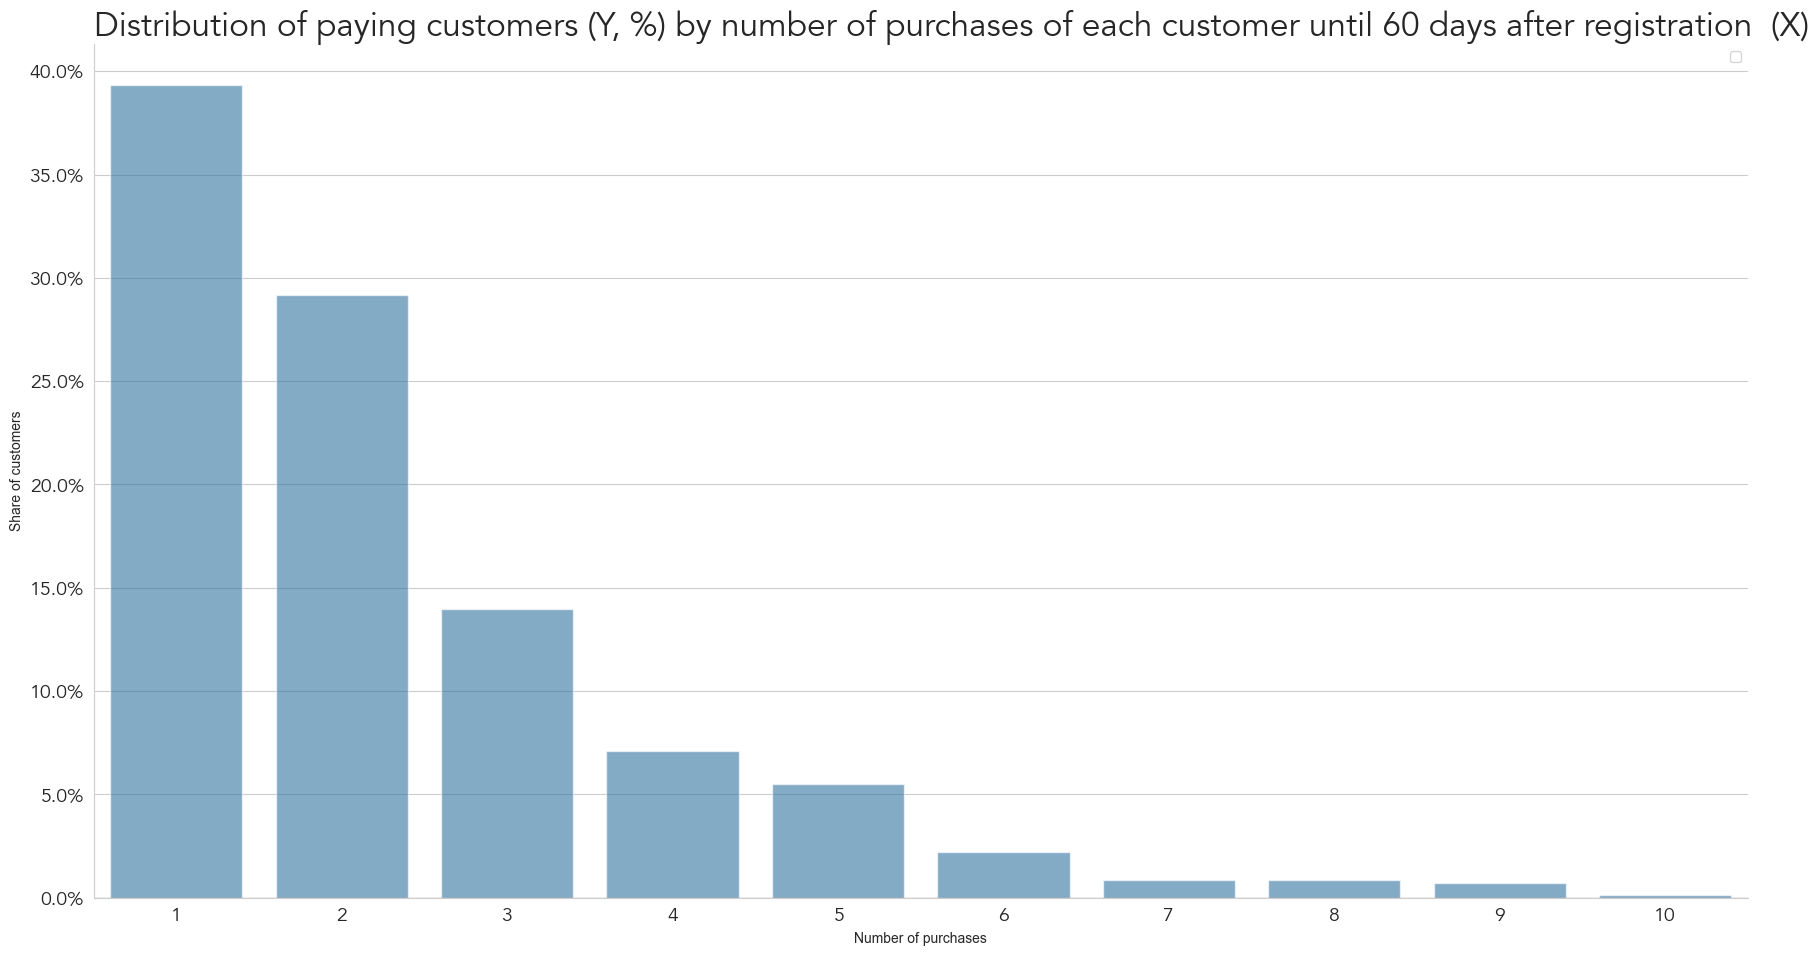

In [33]:

fig, data = da.plot_purchases_distribution(days_limit=60, truncate_share=0.999)
save_plot(fig, "images/purchases_distribution.png")
fig

# From the demo data output, we can see that:
# 39% of all purchasers have purchased only once 
# 29% purchased twice
# 14% purchased three times

In [34]:
# The plot_customers_histogram_per_conversion_day function visualizes the duration between the initial 
# interaction and the first purchase. 
# This function also uses the days_limit parameter

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:218: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/rblinder/Documents/GitHub/LTVision/src/graph.py:223: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



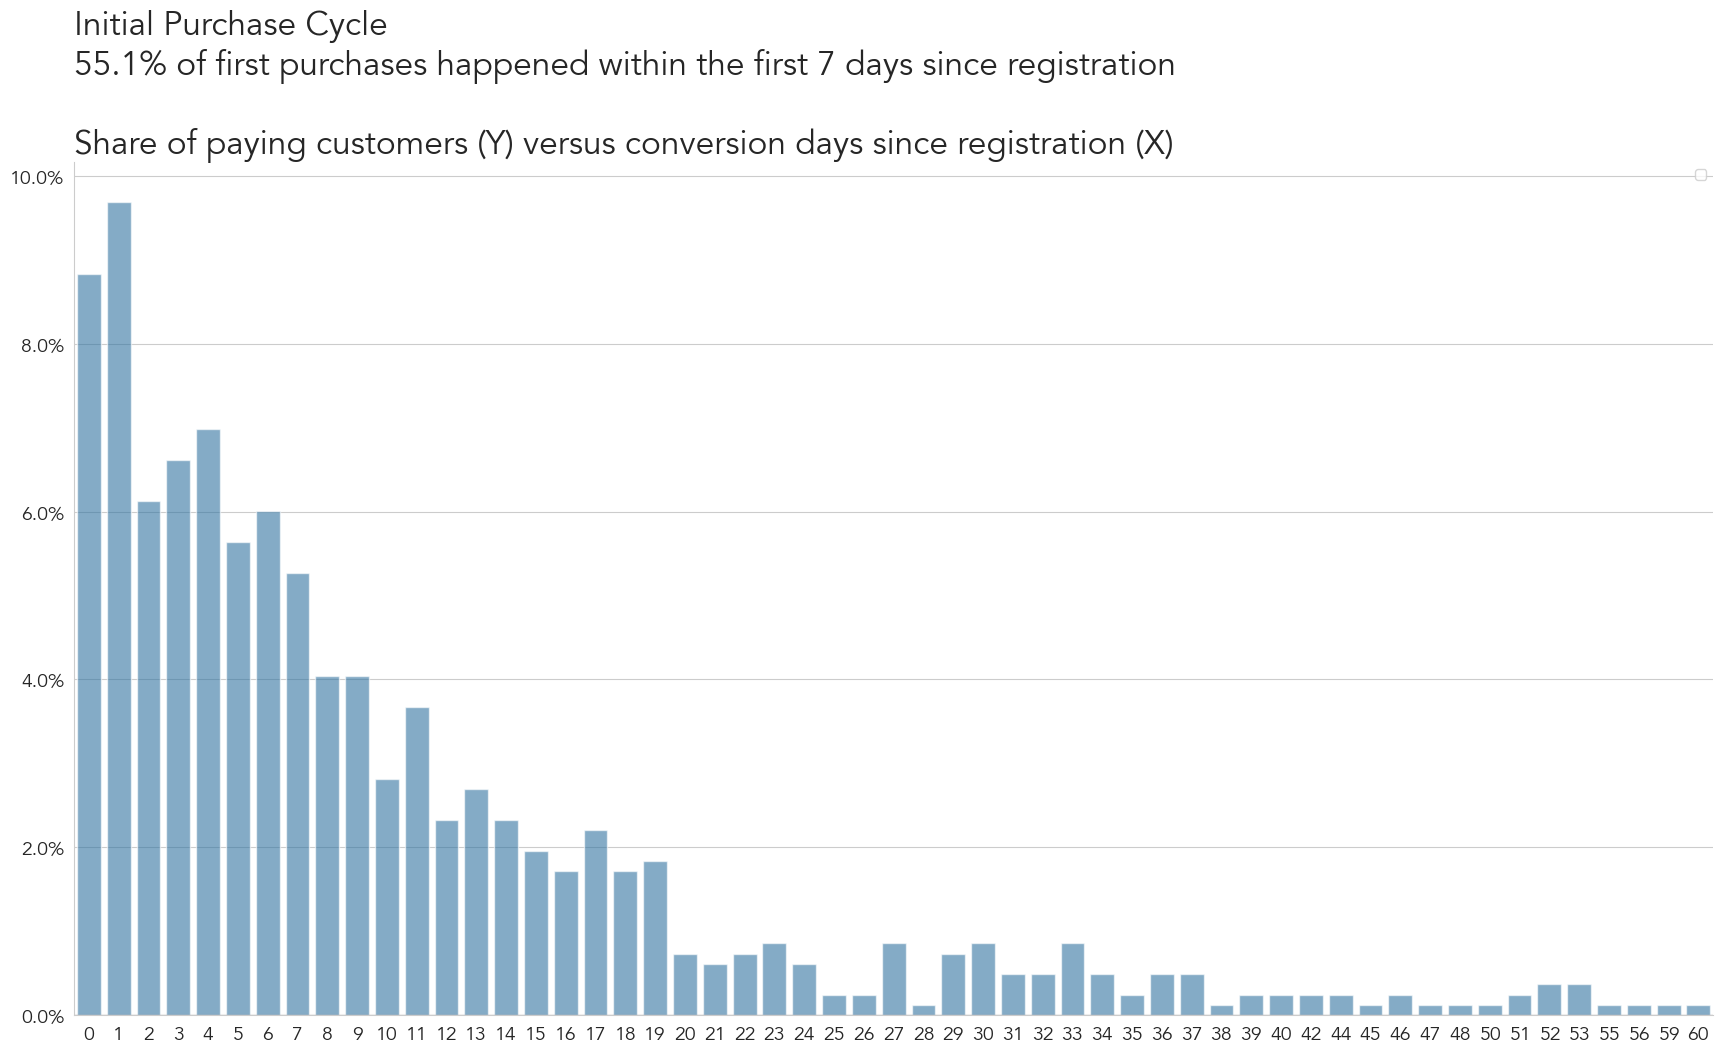

In [35]:
# Plot when the customers convert (i.e. generate a revenue event), 
# showing how many customers are actually captured by the optimization window of the marketing campaign
fig, data = da.plot_customers_histogram_per_conversion_day(days_limit=60)
save_plot(fig, "images/customers_histogram_per_conversion_day.png")
fig

# From the demo data output we can see that: 
# 55% of first-time purchases happened within 7 days of the initial interaction
# Since the remaining 45% of first purchases happen beyond the 7-day optimization window, 
# it means that the current digital customer acquisition campaign is missing out on 45% of the purchases 
# that happen outside the 7-day optimization window

In [36]:
# The Plot_early_late_revenue_correlation function demonstrates the correlation between short-term and long-term purchase values across various timeframes. 
# This function also uses the days_limit parameter:

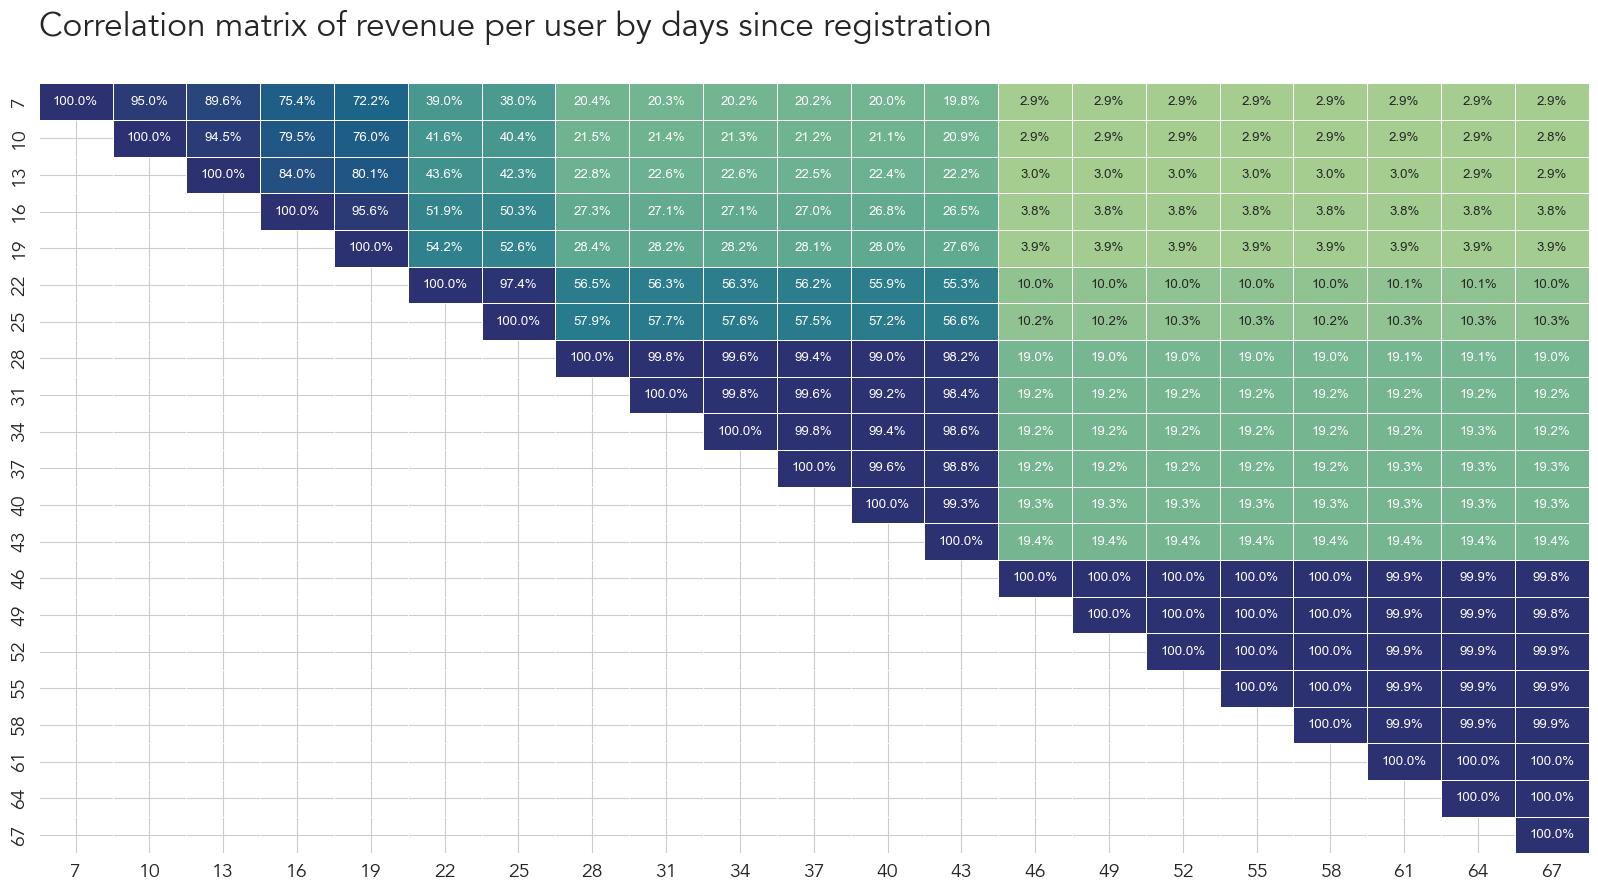

In [37]:
# Show the correlation of the revenue in the first N days of a customer (in this case 7) with the revenye up to M days (e.g. 70)
# the less correlated they are, the less reliable is the early revenue as an optimization metric for a marketing campaign
fig, data = da.plot_early_late_revenue_correlation(days_limit=70)
save_plot(fig, "images/early_late_revenue_correlation.jpeg")
# fig

# From the demo data output we can see that: 
# There is high correlation in early time frames. For example, the correlation between day-7 
# revenue and day-10 revenue is a robust 95%
# However, as time progresses, the correlation between day-7 revenue and future revenue weakens significantly. 
# By day-22, this correlation has already dropped below 40%. This suggests that day-7 revenue is not a 
# reliable indicator for revenue on day-22 and beyond.
# This diminishing correlation between early and later revenue is a crucial indicator of the potential 
# value a pLTV strategy could bring to a business.


In [38]:
# If spending breaks is empty, it will find default values, you can specify your own groups in the format Dict[str, float],
# e.g. {'No spend': 0, 'Low spend': 10, 'Medium spend': 100, 'High spend': 1000}
data = da.estimate_ltv_impact(
    days_limit=60, 
    spending_breaks={},
    population_increase={"No spend": 0.2, "Low spend": 0.1, "High spend": 0.05}, 
    )
data

Starting spending breaks: {'No spend': 0, 'Low spend': 1.38, 'Medium spend': 2.91, 'High spend': 93.0}
Ending spending breaks: {'No spend': 0, 'Low spend': 2.93, 'Medium spend': 8.02, 'High spend': 6007.0}

        By adopting a predicted LTV (pLTV) based strategy for your marketing campaigns, we estimate up to 4.8% increase in revenue.
        This increase represents $847 in revenue for the time period and scope used by the data provided.  
        We find this  impact of the pLTV strategy by assuming an increase in the number of paying customers as passed down by argument [population_increase], and assuming that (1) the average LTVs don't change, and (2) the number of users in other classes don't change
        


,early_class,late_class,customers,late_revenue,assumed_new_customers,assumed_new_late_revenue,abs_revenue_increase
0,No spend,Low spend,255.0,462.145939,280.50,508.360533,46.214594
1,No spend,Medium spend,244.0,1198.888360,244.00,1198.888360,0.000000
2,No spend,High spend,245.0,15130.777043,257.25,15887.315895,756.538852
3,Low spend,Medium spend,10.0,57.069698,10.00,57.069698,0.000000
4,Low spend,High spend,7.0,236.754221,7.35,248.591932,11.837711
5,Low spend,Low spend,8.0,13.886892,8.80,15.275581,1.388689
6,Medium spend,Medium spend,9.0,44.040693,9.00,44.040693,0.000000
7,Medium spend,Low spend,9.0,20.120387,9.90,22.132426,2.012039
8,Medium spend,High spend,5.0,207.232642,5.25,217.594274,10.361632
9,High spend,Medium spend,10.0,57.650931,10.00,57.650931,0.000000
